In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick

In [38]:
# ------------------------------------
# ROOM DIMENSIONS: 
# XMIN = 0, XMAX = 4 (LENGTH)
# YMIN = 0, YMAX = 3 (HEIGHT)
# ZMIN = 0, ZMAX = 3 (WIDTH)

# SUSCEPTIBLE PERSON NOSTRILS:
# XMIN = 2.585, XMAX = 2.615
# YMIN = 1.25, YMAX = 1.27
# ZMIN = 2.28, ZMAX = 2.3
# ------------------------------------

modes = ['Plane Output','Decay']
areas = ['Whole Domain','Table','Mouth Layer']
cases = ['closedRoom','natural','mechanical', 'oldVentilator']
diams = ['10um','30um','50um']
xmins = [0, 2, 0]
xmaxs = [4, 4, 4]
ymins = [0, 0, 1]
ymaxs = [3, 3, 1]
zmins = [0, 0, 0]
zmaxs = [3, 3, 3]

In [16]:
# CREATE OUTPUT DIRECTORIES (OPTIONAL)

root = os.getcwd() + '/Output Files/'

for case in cases:
    casename = root + case
    if not os.path.exists(casename):
        os.makedirs(casename)

    for diam in diams:
        diamname = casename + '/' + diam
        if not os.path.exists(diamname):
            os.makedirs(diamname)

        for mode in modes:
            modename = diamname + '/' + mode
            if not os.path.exists(modename):
                os.makedirs(modename)

            for area in areas:
                areaname = modename + '/' + area
                if not os.path.exists(areaname):
                    os.makedirs(areaname)

In [39]:
def getoutput(case,diam,mode,area):
    
    root = os.path.dirname(os.getcwd())
    datalocation = cases[case-1] + '_' + diams[diam-1]
    foldername = '../'+ datalocation + '/' + modes[mode-1]

    xmin = xmins[area-1]
    xmax = xmaxs[area-1]

    ymin = ymins[area-1]
    ymax = ymaxs[area-1]

    zmin = zmins[area-1]
    zmax = zmaxs[area-1]

    if case==1 and area==1:
        ymin = 0.5
    
    if case>1 and area==1:
        ymax = 2.5

    mint = 1e9
    maxt = 0
    for name in os.listdir(foldername):
        if float(name[12:]) < mint:
            mint = float(name[12:])
        if float(name[12:]) > maxt:
            maxt = float(name[12:])

    times = np.arange(mint,maxt+1,step=15)
    dpms = []
    nvir = []

    times2 = np.arange(mint+15,maxt-15,step=60)
    # print(times2)
    nvir_delta = np.zeros_like(times2)
    countn = 0
    memory = 0

    for i,v in enumerate(times):
        filename = foldername + '/planeoutput-' + str(float(v))

        val1=0
        val2=0
        with open(filename,'r') as file:
            count = 0
            for lines in file:
                count+=1
                if count>1:
                    values = lines.split()
                    if float(values[2])>=ymin and float(values[2])<=ymax:
                            val1+=float(values[8])*float(values[10])

                    if case==3 and diam ==1:
                        if float(values[1])>=2.4 and float(values[1])<=2.76:
                            if float(values[2])>=1.2 and float(values[2])<=1.3:
                                if float(values[3])>=2.28 and float(values[3])<=2.3:
                                    val2+=float(values[9])
                                    print(float(values[9]))
                    
                    else:
                        if float(values[1])>=2.585 and float(values[1])<=2.615:
                            if float(values[2])>=1.24 and float(values[2])<=1.26:
                                if float(values[3])>=2.28 and float(values[3])<=2.3:
                                    val2+=float(values[9])
                
        dpms.append(val1)
        nvir.append(val2)

        if (v%60==0) and (v<=1800) and mode==1:
            nvir_delta[countn] = val2 - memory
            countn+=1
            memory = val2

    dpms = np.array(dpms)
    nvir = np.array(nvir)

    # times2 = np.array(times2)
    # dpms2 = np.array(dpms2)

    rootname = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diams[diam-1] + '/' + modes[mode-1] + '/' + areas[area-1]

    filename1 = rootname + '/dpms.csv'
    filename2 = rootname + '/nvir.csv'
    filetimes1 = rootname + '/times.csv'
    filetimes2 = rootname + '/times2.csv'
    filename3 = rootname + '/nvir_delta.csv'

    np.savetxt(filename1,dpms)
    np.savetxt(filename2,nvir)
    np.savetxt(filetimes1,times)
    np.savetxt(filename3,nvir_delta)
    np.savetxt(filetimes2,times2)



In [57]:
# cases = ['closedRoom','natural','mechanical']
# diams = ['10um','30um','50um']
# modes = ['Plane Output','Decay']
# areas = ['Whole Domain','Table','Mouth Layer']

case = 4
diam = 2
mode = 2
area = 1

# for case in cases:
#     for diam in diams:
#         for mode in modes:
#             for area in areas:
#                 getoutput(case,diam,mode,area)

getoutput(case,diam,mode,area)

In [36]:
newdiams =['10um','30um']

for i1,v1 in enumerate(cases):
    for i2,v2 in enumerate(newdiams):
        mode = 2
        area = 1

        print(v1,v2)

        getoutput(i1+1,i2+1,mode,area)

closedRoom 10um
closedRoom 30um
natural 10um
natural 30um
mechanical 10um
mechanical 30um


In [5]:
# COMPUTE PROBABILITY

d = nvir/16000

k = 410

power = -1/k * d
P = 1 - np.exp(power)

NameError: name 'nvir' is not defined

In [94]:
nvir_normal = np.zeros(int(len(nvir)/4)-2)
timeshalf = np.zeros(int(len(times)/4)-2)
timeshalf[0] = 60
for i in range(1,int(len(nvir)/4)-2):
    timeshalf[i] = times[i*4+1]
    nvir_normal[i] = nvir[i*4+3]-nvir[i*4-1]


In [ ]:
stable, = np.where(timeshalf==int(13.5*60))
end, = np.where(timeshalf==float(1800-30))
# print(timeshalf,stable[0],end[0])

times_stable = timeshalf[stable[0]:end[0]]
nvir_stable = nvir_normal[stable[0]:end[0]]

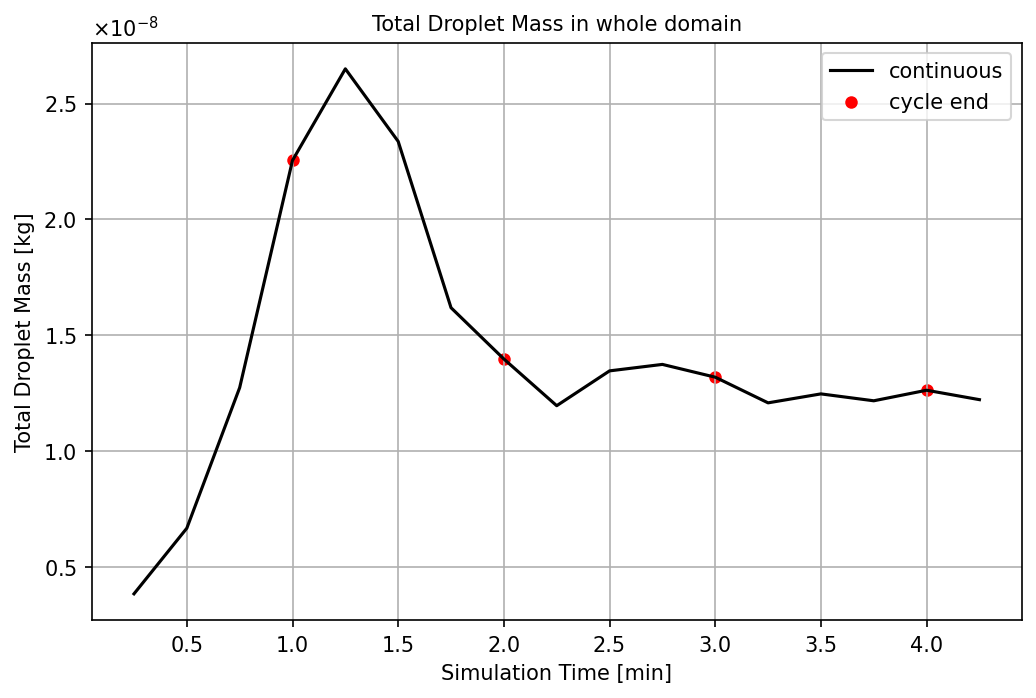

In [6]:


fig,axs = plt.subplots(nrows=1, ncols=1, num=1, figsize=(8,5),dpi=150)
axs.ticklabel_format(style='sci',axis='y', useMathText=True)
axs.plot(times/60,dpms,'k-',label='continuous')
axs.scatter(times2/60, dpms2, c='r', s=25, label = 'cycle end')
axs.legend()
axs.set_xlabel('Simulation Time [min]')
axs.set_ylabel('Total Droplet Mass [kg]')
axs.set_title('Total Droplet Mass in whole domain', fontsize=10)
# plt.minorticks_on()
plt.grid(which='major')
# plt.grid(which='minor',linestyle=':')

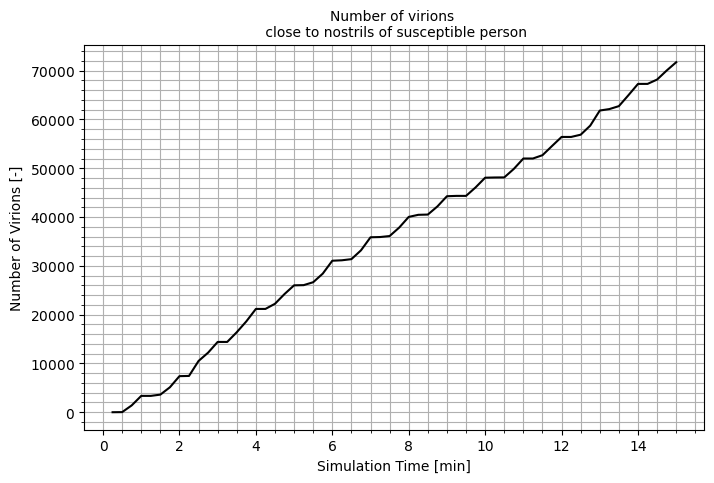

In [29]:
fig,axs = plt.subplots(nrows=1, ncols=1, num=1, figsize=(8,5),dpi=100)
axs.ticklabel_format(style='sci',axis='y', useMathText=True)
axs.plot(times/60,nvir,'k')
# axs.plot(timeshalf/60,nvir_normal,'k')
# axs.scatter(timeshalf/60,nvir_normal,marker='o')
# axs.scatter(times_stable/60,nvir_stable,marker='o',c='r')
axs.set_xlabel('Simulation Time [min]')
axs.set_ylabel('Number of Virions [-]')
axs.set_title('Number of virions \n close to nostrils of susceptible person', fontsize=10)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor',linestyle='-')

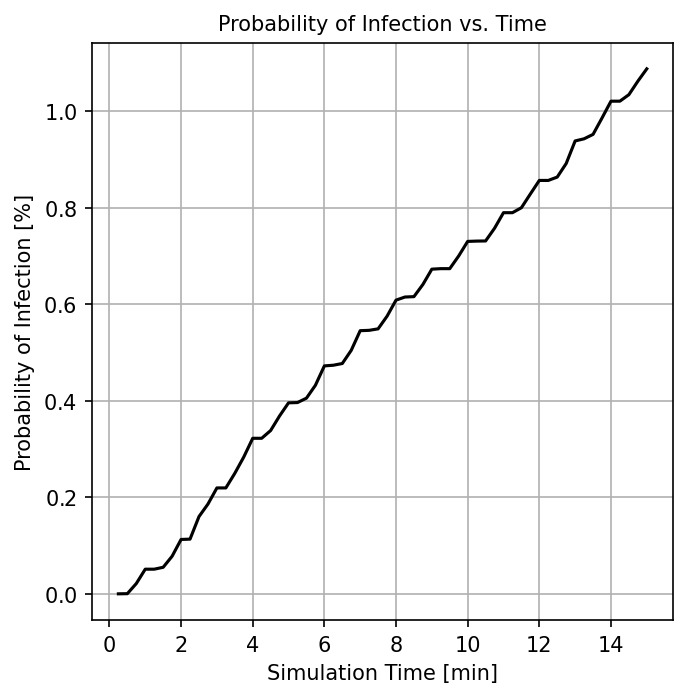

In [30]:
fig,ax = plt.subplots(num=1, figsize=(5,5),dpi=150)
p = ax.plot(times/60,P*100,'k',label='all')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Probability of Infection [%]')
plt.title('Probability of Infection vs. Time', fontsize=10)
plt.grid(which='major')

In [51]:
d_cr10 = np.array(pd.read_csv(os.getcwd() + '/Output Files/closedRoom/10um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_cr10 = np.array(pd.read_csv(os.getcwd() + '/Output Files/closedRoom/10um/Plane Output/Whole Domain/times.csv'))[:,0]
d_cr10 = np.insert(d_cr10,0,0)
t_cr10 = np.insert(t_cr10,0,0)

d_cr30 = np.array(pd.read_csv(os.getcwd() + '/Output Files/closedRoom/30um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_cr30 = np.array(pd.read_csv(os.getcwd() + '/Output Files/closedRoom/30um/Plane Output/Whole Domain/times.csv'))[:,0]
d_cr30 = np.insert(d_cr30,0,0)
t_cr30 = np.insert(t_cr30,0,0)

d_cr50 = np.array(pd.read_csv(os.getcwd() + '/Output Files/closedRoom/50um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_cr50 = np.array(pd.read_csv(os.getcwd() + '/Output Files/closedRoom/50um/Plane Output/Whole Domain/times.csv'))[:,0]
d_cr50 = np.insert(d_cr50,0,0)
t_cr50 = np.insert(t_cr50,0,0)

d_nv10 = np.array(pd.read_csv(os.getcwd() + '/Output Files/natural/10um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_nv10 = np.array(pd.read_csv(os.getcwd() + '/Output Files/natural/10um/Plane Output/Whole Domain/times.csv'))[:,0]
d_nv10 = np.insert(d_nv10,0,0)
t_nv10 = np.insert(t_nv10,0,0)

d_nv30 = np.array(pd.read_csv(os.getcwd() + '/Output Files/natural/30um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_nv30 = np.array(pd.read_csv(os.getcwd() + '/Output Files/natural/30um/Plane Output/Whole Domain/times.csv'))[:,0]
d_nv30 = np.insert(d_nv30,0,0)
t_nv30 = np.insert(t_nv30,0,0)

d_nv50 = np.array(pd.read_csv(os.getcwd() + '/Output Files/natural/50um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_nv50 = np.array(pd.read_csv(os.getcwd() + '/Output Files/natural/50um/Plane Output/Whole Domain/times.csv'))[:,0]
d_nv50 = np.insert(d_nv50,0,0)
t_nv50 = np.insert(t_nv50,0,0)

d_mv10 = np.array(pd.read_csv(os.getcwd() + '/Output Files/mechanical/10um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_mv10 = np.array(pd.read_csv(os.getcwd() + '/Output Files/mechanical/10um/Plane Output/Whole Domain/times.csv'))[:,0]
d_mv10 = np.insert(d_mv10,0,0)
t_mv10 = np.insert(t_mv10,0,0)

d_mv30 = np.array(pd.read_csv(os.getcwd() + '/Output Files/mechanical/30um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_mv30 = np.array(pd.read_csv(os.getcwd() + '/Output Files/mechanical/30um/Plane Output/Whole Domain/times.csv'))[:,0]
d_mv30 = np.insert(d_mv30,0,0)
t_mv30 = np.insert(t_mv30,0,0)

d_mv50 = np.array(pd.read_csv(os.getcwd() + '/Output Files/mechanical/50um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_mv50 = np.array(pd.read_csv(os.getcwd() + '/Output Files/mechanical/50um/Plane Output/Whole Domain/times.csv'))[:,0]
d_mv50 = np.insert(d_mv50,0,0)
t_mv50 = np.insert(t_mv50,0,0)

d_ov10 = np.array(pd.read_csv(os.getcwd() + '/Output Files/oldVentilator/10um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_ov10 = np.array(pd.read_csv(os.getcwd() + '/Output Files/oldVentilator/10um/Plane Output/Whole Domain/times.csv'))[:,0]
d_ov10 = np.insert(d_ov10,0,0)
t_ov10 = np.insert(t_ov10,0,0)

d_ov30 = np.array(pd.read_csv(os.getcwd() + '/Output Files/oldVentilator/30um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_ov30 = np.array(pd.read_csv(os.getcwd() + '/Output Files/oldVentilator/30um/Plane Output/Whole Domain/times.csv'))[:,0]
d_ov30 = np.insert(d_ov30,0,0)
t_ov30 = np.insert(t_ov30,0,0)


Text(0, 0.5, 'Total Droplet Mass [kg]')

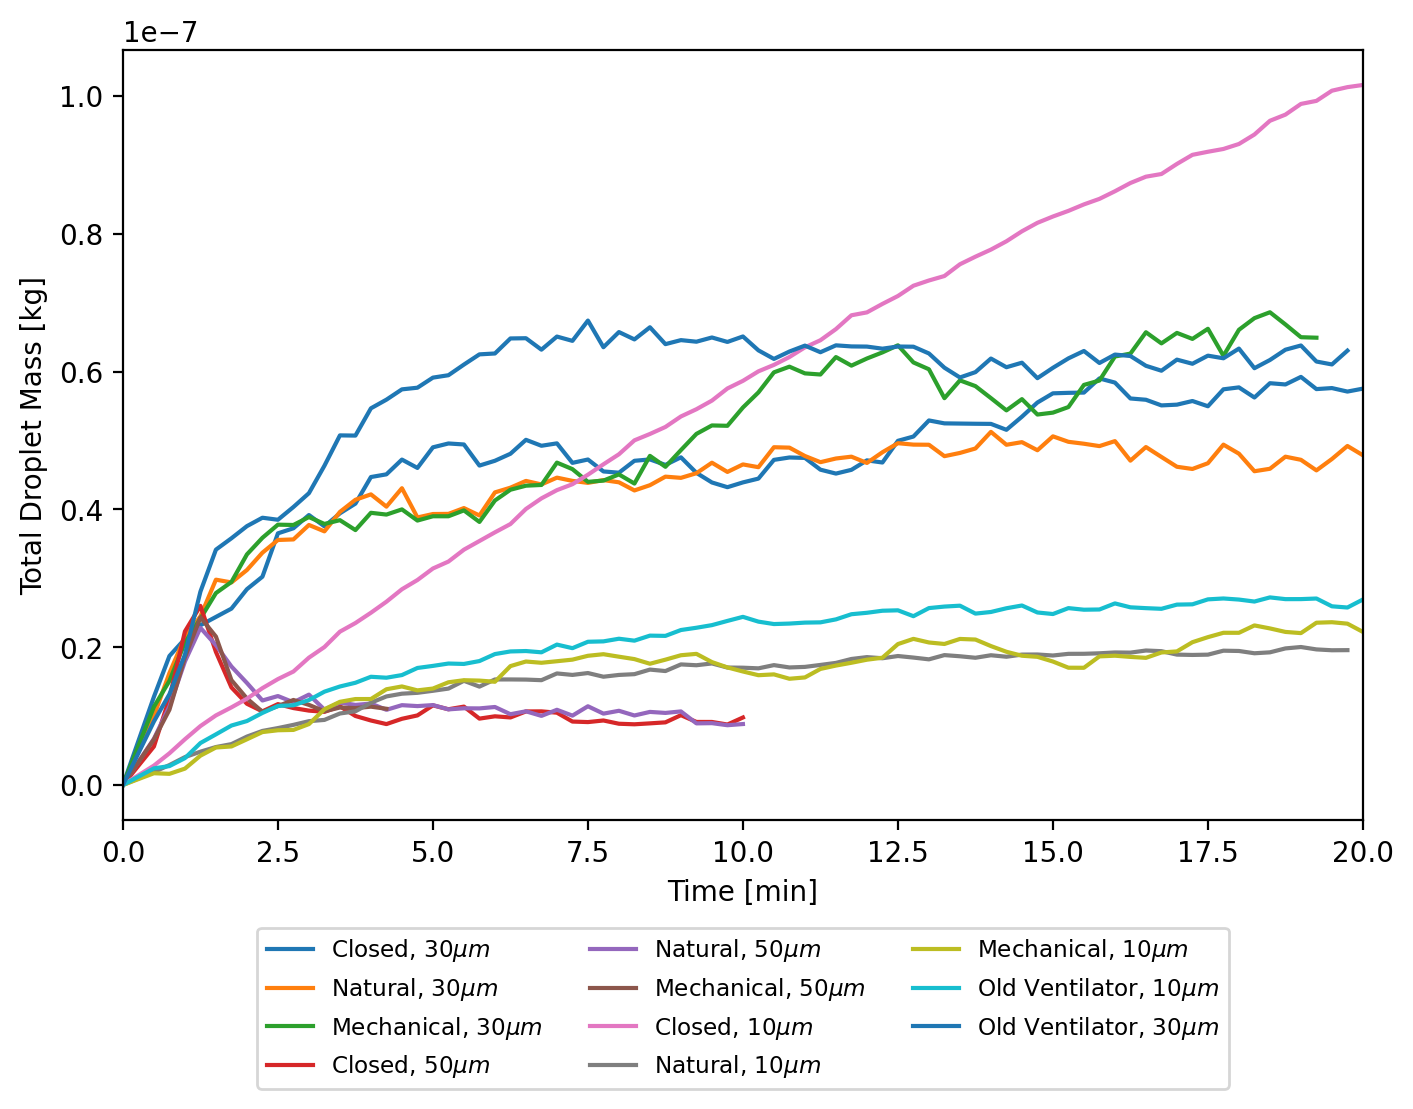

In [52]:
plt.figure(figsize=(8,5),dpi=200)
plt.plot(t_cr30/60,d_cr30,label='Closed, 30$\mu m$')
plt.plot(t_nv30/60,d_nv30,label='Natural, 30$\mu m$')
plt.plot(t_mv30/60,d_mv30,label='Mechanical, 30$\mu m$')
plt.plot(t_cr50/60,d_cr50,label='Closed, 50$\mu m$')
plt.plot(t_nv50/60,d_nv50,label='Natural, 50$\mu m$')
plt.plot(t_mv50/60,d_mv50,label='Mechanical, 50$\mu m$')
plt.plot(t_cr10/60,d_cr10,label='Closed, 10$\mu m$')
plt.plot(t_nv10/60,d_nv10,label='Natural, 10$\mu m$')
plt.plot(t_mv10/60,d_mv10,label='Mechanical, 10$\mu m$')
plt.plot(t_ov10/60,d_ov10,label='Old Ventilator, 10$\mu m$')
plt.plot(t_ov30/60,d_ov30,label='Old Ventilator, 30$\mu m$')
plt.xlim([0,20])
# plt.ylim([0,8e-8])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),ncol=3,fontsize='small')
plt.xlabel('Time [min]')
plt.ylabel('Total Droplet Mass [kg]')

In [45]:
root = "./Output Files/"

d_cr10 = np.array(pd.read_csv("Output Files/closedRoom/10um/Decay/Whole Domain/dpms.csv"))[:,0]
t_cr10 = np.array(pd.read_csv('Output Files/closedRoom/10um/Decay/Whole Domain/times.csv'))[:,0]
t_cr10 = t_cr10 - t_cr10[0]

d_cr30 = np.array(pd.read_csv("Output Files/closedRoom/30um/Decay/Whole Domain/dpms.csv"))[:,0]
t_cr30 = np.array(pd.read_csv('Output Files/closedRoom/30um/Decay/Whole Domain/times.csv'))[:,0]
t_cr30 = t_cr30 - t_cr30[0]

d_cr50 = np.array(pd.read_csv('Output Files/closedRoom/50um/Decay/Whole Domain/dpms.csv'))[:,0]
t_cr50 = np.array(pd.read_csv('Output Files/closedRoom/50um/Decay/Whole Domain/times.csv'))[:,0]
t_cr50 = t_cr50 - t_cr50[0]

d_nv30 = np.array(pd.read_csv('Output Files/natural/30um/Decay/Whole Domain/dpms.csv'))[:,0]
t_nv30 = np.array(pd.read_csv('Output Files/natural/30um/Decay/Whole Domain/times.csv'))[:,0]
t_nv30 = t_nv30 - t_nv30[0]

d_nv10 = np.array(pd.read_csv('Output Files/natural/10um/Decay/Whole Domain/dpms.csv'))[:,0]
t_nv10 = np.array(pd.read_csv('Output Files/natural/10um/Decay/Whole Domain/times.csv'))[:,0]
t_nv10 = t_nv10 - t_nv10[0]

d_mv10 = np.array(pd.read_csv('Output Files/mechanical/10um/Decay/Whole Domain/dpms.csv'))[:,0]
t_mv10 = np.array(pd.read_csv('Output Files/mechanical/10um/Decay/Whole Domain/times.csv'))[:,0]
t_mv10 = t_mv10 - t_mv10[0]

d_mv30 = np.array(pd.read_csv('Output Files/mechanical/30um/Decay/Whole Domain/dpms.csv'))[:,0]
t_mv30 = np.array(pd.read_csv('Output Files/mechanical/30um/Decay/Whole Domain/times.csv'))[:,0]
t_mv30 = t_mv30 - t_mv30[0]

d_ov10 = np.array(pd.read_csv('Output Files/oldVentilator/10um/Decay/Whole Domain/dpms.csv'))[:,0]
t_ov10 = np.array(pd.read_csv('Output Files/oldVentilator/10um/Decay/Whole Domain/times.csv'))[:,0]
t_ov10 = t_ov10 - t_ov10[0]



Text(0, 0.5, 'Total Droplet Mass [kg]')

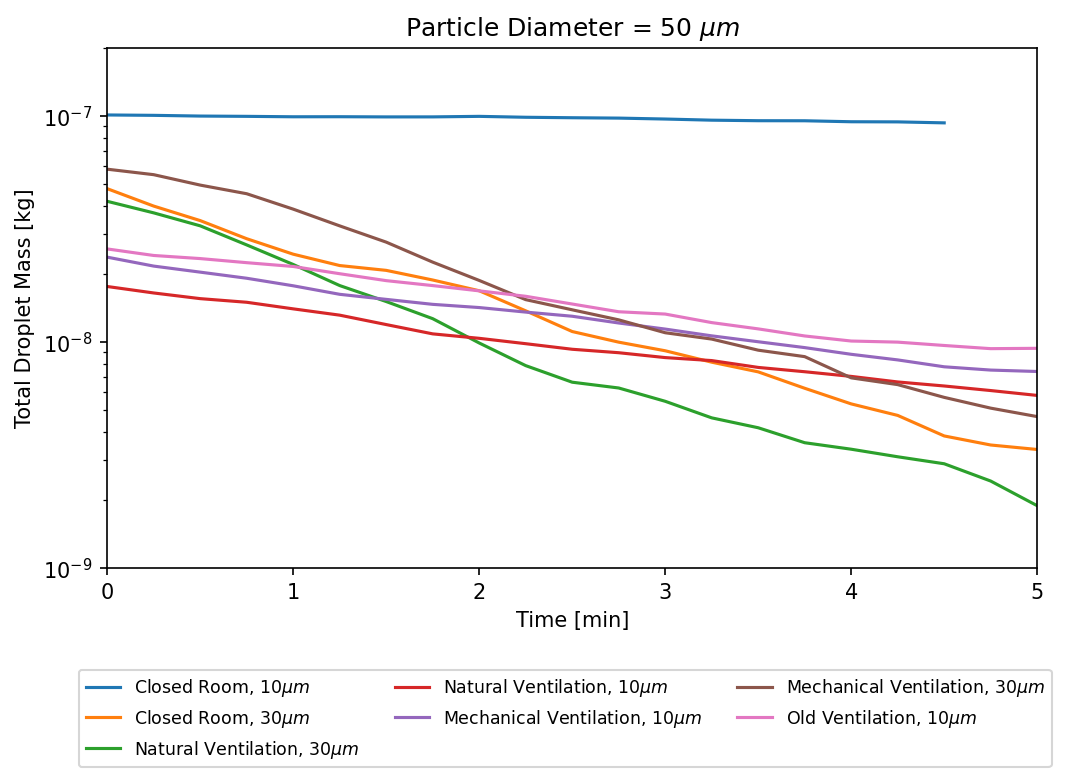

In [46]:
plt.figure(figsize=(8,4.5),dpi=150)
# plt.plot(t_cr50/60,d_cr50,label='50$\mu m$',color='C0')
plt.semilogy(t_cr10/60,d_cr10,label='Closed Room, 10$\mu m$')
plt.semilogy(t_cr30/60,d_cr30,label='Closed Room, 30$\mu m$')
plt.semilogy(t_nv30/60,d_nv30,label='Natural Ventilation, 30$\mu m$')
plt.semilogy(t_nv10/60,d_nv10,label='Natural Ventilation, 10$\mu m$')
plt.semilogy(t_mv10/60,d_mv10,label='Mechanical Ventilation, 10$\mu m$')
plt.semilogy(t_mv30/60,d_mv30,label='Mechanical Ventilation, 30$\mu m$')
plt.semilogy(t_ov10/60,d_ov10,label='Old Ventilation, 10$\mu m$')
plt.xlim([0,5])
plt.ylim([1e-9,2e-7])
plt.legend(loc='lower right', ncol=3, bbox_to_anchor=(1.025, -0.4), fontsize='small')
plt.xlabel('Time [min]')
plt.title('Particle Diameter = 50 $\mu m$')
plt.ylabel('Total Droplet Mass [kg]')

[   52.27378612 -1174.80323009]
3


Text(0, 0.5, 'Probability of Infection [%]')

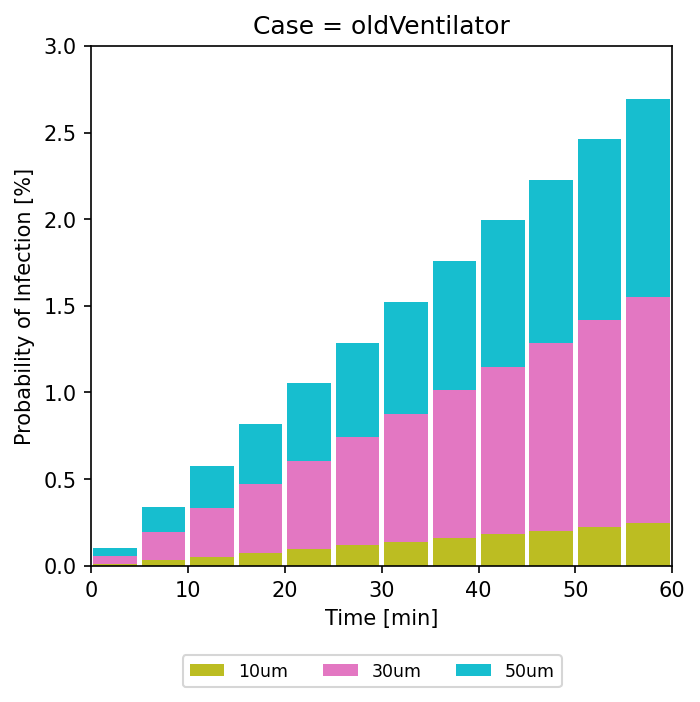

In [59]:
from scipy.optimize import curve_fit

def linear(x,a,b):
    return x*a + b

def parabolic(x,a,b,c):
    return a*(x+c)**2 + b

modes = ['Plane Output','Decay']
areas = ['Whole Domain','Table','Mouth Layer']
cases = ['closedRoom','natural','mechanical', 'oldVentilator']
diams = ['10um','30um','50um']

case = 4
times = np.linspace(0,60,num=200)
c = ['C8','C6','C9']

plt.figure(figsize=(5,4.5),dpi=150)

coeffs = []

for n,diam in enumerate(diams):
    foldername = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diam + '/Plane Output/Whole Domain/'
    # times_data = np.array(pd.read_csv(foldername + 'times2.csv', header=None))[:,0]
    # nvir_data = np.array(pd.read_csv(foldername + 'nvir_delta.csv', header=None))[:,0]
    times_data = np.array(pd.read_csv(foldername + 'times.csv', header=None))[:,0]
    nvir_data = np.array(pd.read_csv(foldername + 'nvir.csv', header=None))[:,0]*4
    if case==3 and diam=='10um':
        nvir_data = nvir_data*50
    delta = (nvir_data[3] - nvir_data[1])

    length60 = int((len(times_data))/4)
    times_60 = np.zeros(length60)
    nvir_60 = np.zeros(length60)

    for i in range(length60):
        times_60[i] = times_data[i*4 + 3]
        nvir_60[i] = nvir_data[i*4 + 3] - delta*(i+1)

    # for i,v in enumerate(nvir_data):
    #     if i%4<2:
    #         nvir_data[i] = nvir_data[i] - delta*int(i/4)
    #     elif i%4==3:
    #         nvir_data[i] = nvir_data[i] - delta*int(i/4 + 1)
    #     else:
    #         nvir_data[i] = nvir_data[i] - delta*int(i/4) - delta/2
    times_data = np.insert(times_data,0,0)
    nvir_data = np.insert(nvir_data,0,0)
    # plt.plot(times_60/60, nvir_60, color=c[n], label='%s' %(diam))
    # plt.scatter(times_60/60,nvir_60)

    popt, pcov = curve_fit(linear, times_data, nvir_data)
    a = popt[0]
    b = popt[1]
    coeffs.append([a,b])
 
    slope = (nvir_data[-1] - nvir_data[0])/(times_data[-1]-times_data[0])

    x = np.linspace(0,1200,num=100)
    y = linear(x,a,b)
    # plt.plot(x/60,y/16000,color=c[n],linestyle=':')
    # plt.plot(times_data/60, nvir_data/16000, color=c[n], label='%s' %(diam))
    # plt.scatter(times_data/60,nvir_data)

coeffs = np.array(coeffs)
coeffs_total = np.sum(coeffs,axis=0)
print(coeffs_total)
x1 = np.arange(0,3660,step=60)
x2 = np.arange(150,3630,step=300)
y = linear(x2,coeffs_total[0],coeffs_total[1])
d = y/16000
k=410
power = -1/k * d
P = 1 - np.exp(power)

sum = coeffs_total[0]
P_array = 100/sum *np.array([P*coeffs[0,0], P*coeffs[1,0], P*coeffs[2,0]])
# plt.plot(x/60,y,color='k',linestyle='-')
# plt.plot(x1/60,P*100,color='k',linestyle='-')

# plt.bar(x2/60,P_array*100,4.5)

weight_counts = {
    "10um": P_array[0,:],
    "30um": P_array[1,:],
    "50um": P_array[2,:],
}

bottom = np.zeros(12)

ax = plt.gca()

c = ['C9','C8','C6']
count = 0
for boolean, weight_count in weight_counts.items():
    count+=1
    p = ax.bar(x2/60, weight_count, 4.5, label=boolean, bottom=bottom,color=c[count%3])
    bottom += weight_count
print(count)

# plt.xlim([0,20])
# plt.ylim([0,2])
plt.xlim(left=0,right=60)
plt.ylim(bottom=0,top=3)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),ncol=3,fontsize='small')
plt.legend(loc='lower right', ncol=3, bbox_to_anchor=(0.825, -0.25), fontsize='small')
plt.title('Case = %s' %cases[case-1])
plt.xlabel('Time [min]')
plt.ylabel('Probability of Infection [%]')

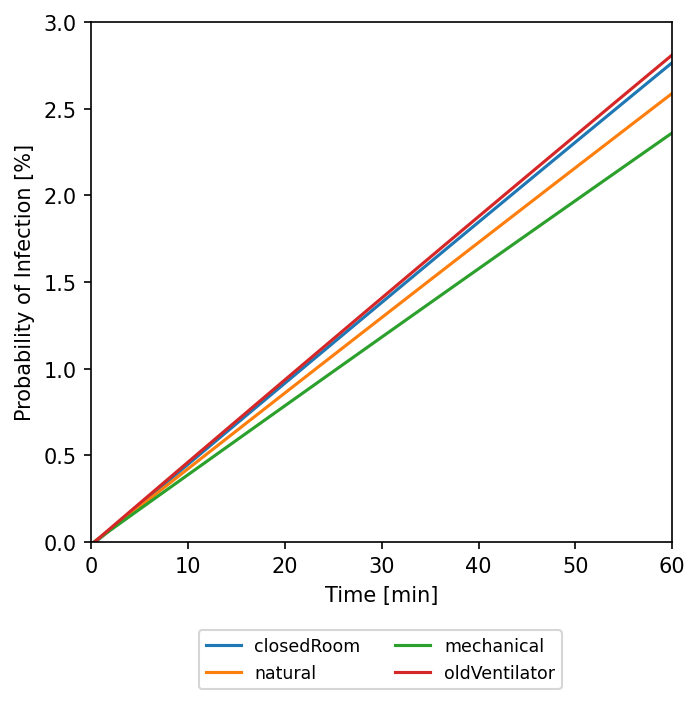

In [70]:
x1 = np.arange(0,3660,step=60)
plt.figure(figsize=(5,4.5),dpi=150)

coeffs_total = [51.54736203, -1572.50766086]
y = linear(x1,coeffs_total[0],coeffs_total[1])
d = y/16000
k=410
power = -1/k * d
P = 1 - np.exp(power)
plt.plot(x1/60,P*100,color='C0',linestyle='-',label='closedRoom')

coeffs_total = [48.12631949, -1207.13733262]
y = linear(x1,coeffs_total[0],coeffs_total[1])
d = y/16000
k=410
power = -1/k * d
P = 1 - np.exp(power)
plt.plot(x1/60,P*100,color='C1',linestyle='-',label='natural')

coeffs_total = [43.7659092,  -857.57245824]
y = linear(x1,coeffs_total[0],coeffs_total[1])
d = y/16000
k=410
power = -1/k * d
P = 1 - np.exp(power)
plt.plot(x1/60,P*100,color='C2',linestyle='-',label='mechanical')

coeffs_total = [52.27378612, -1174.80323009]
y = linear(x1,coeffs_total[0],coeffs_total[1])
d = y/16000
k=410
power = -1/k * d
P = 1 - np.exp(power)
plt.plot(x1/60,P*100,color='C3',linestyle='-',label='oldVentilator')

plt.xlim(left=0,right=60)
plt.ylim(bottom=0,top=3)
plt.xlabel('Time [min]')
plt.ylabel('Probability of Infection [%]')
plt.legend(loc='lower right', ncol=2, bbox_to_anchor=(0.825, -0.3), fontsize='small')

Text(0, 0.5, 'Viral exposure [-]')

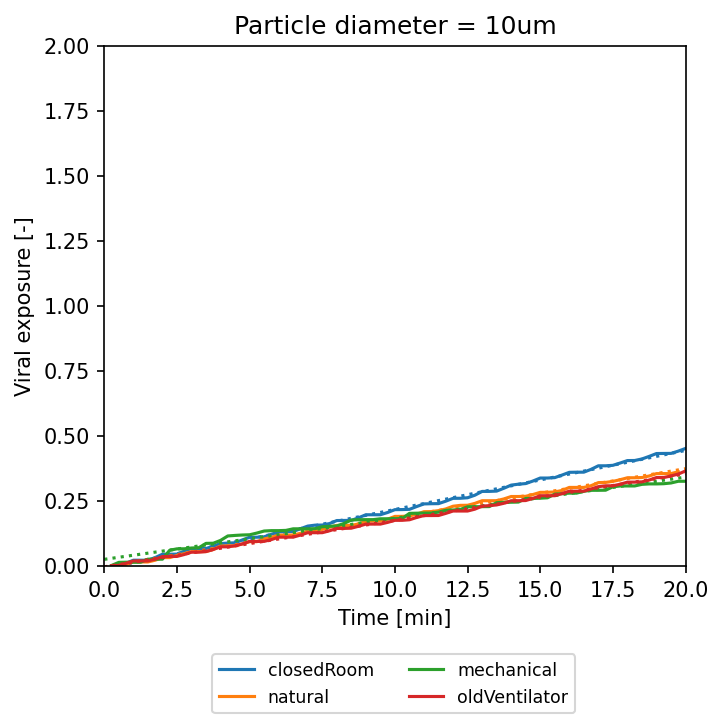

In [69]:
from scipy.optimize import curve_fit

def linear(x,a,b):
    return x*a + b

def parabolic(x,a,b):
    return a*(x**2) + b

modes = ['Plane Output','Decay']
areas = ['Whole Domain','Table','Mouth Layer']
cases = ['closedRoom','natural','mechanical','oldVentilator']
diams = ['10um','30um','50um']

diam = 1
times = np.linspace(0,60,num=200)
c = ['C0','C1','C2','C3']

plt.figure(figsize=(5,4.5),dpi=150)

for i,case in enumerate(cases):
    foldername = os.getcwd() + '/Output Files/' + case + '/' + diams[diam-1] + '/Plane Output/Whole Domain/'
    times_data = np.array(pd.read_csv(foldername + 'times.csv', header=None))[:,0]
    nvir_data = np.array(pd.read_csv(foldername + 'nvir.csv', header=None))[:,0]*4
    if case=='mechanical' and diam==1:
        nvir_data = nvir_data*50
    
    nvir_new = np.zeros(len(nvir_data)-1)
    times_new = np.zeros_like(nvir_new)
    for j in range(len(nvir_data)-1):
        nvir_new[j] = nvir_data[j+1] - nvir_data[j]
        times_new[j] = (times_data[j+1] + times_data[j])/2

    popt, pcov = curve_fit(linear, times_data, nvir_data)
    a = popt[0]
    b = popt[1]

    # slope = (nvir_data[-1] - nvir_data[0])/(times_data[-1]-times_data[0])

    x = np.linspace(0,1200,num=100)
    y = a*(x) + b
    plt.plot(x/60,y/16000,color=c[i],linestyle=':')
    plt.plot(times_data/60, nvir_data/16000, color=c[i], label='%s' %(case))
    # plt.plot(times_new/60, nvir_new, color=c[i], label='%s' %(case))

plt.xlim([0,20])
plt.ylim([0,2])
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),ncol=3,fontsize='small')
plt.legend(loc='lower right', ncol=2, bbox_to_anchor=(0.825, -0.3), fontsize='small')
plt.title('Particle diameter = %s' %diams[diam-1])
plt.xlabel('Time [min]')
plt.ylabel('Viral exposure [-]')

Text(0, 0.5, 'Viral exposure [-]')

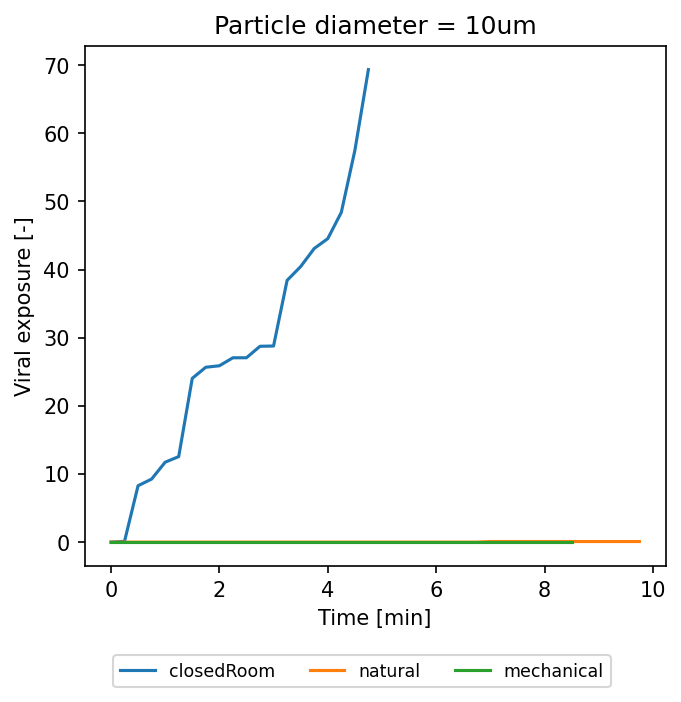

In [44]:
modes = ['Plane Output','Decay']
areas = ['Whole Domain','Table','Mouth Layer']
cases = ['closedRoom','natural','mechanical']
diams = ['10um','30um','50um']

diam = 1
times = np.linspace(0,60,num=200)
c = ['C0','C1','C2']

plt.figure(figsize=(5,4.5),dpi=150)

for i,case in enumerate(cases):
    foldername = os.getcwd() + '/Output Files/' + case + '/' + diams[diam-1] + '/Decay/Whole Domain/'
    times_data = np.array(pd.read_csv(foldername + 'times.csv', header=None))[:,0]
    nvir_data = np.array(pd.read_csv(foldername + 'nvir.csv', header=None))[:,0]

    times_data = times_data - times_data[0]
    nvir_data = nvir_data - nvir_data[0]
    plt.plot(times_data/60, nvir_data, color=c[i], label='%s' %(case))

# plt.xlim([0,20])
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),ncol=3,fontsize='small')
plt.legend(loc='lower right', ncol=3, bbox_to_anchor=(0.92, -0.25), fontsize='small')
plt.title('Particle diameter = %s' %diams[diam-1])
plt.xlabel('Time [min]')
plt.ylabel('Viral exposure [-]')